# Absenteeism At Work

**Imporing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

**Uploading the dataset**

In [2]:
# read the data to a data frame
workdf = pd.read_csv('DS_C12_S3_Clustering_AbsenteeismAtWork_Data.csv',sep=';')

In [3]:
workdf

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [4]:
workdf.shape

(740, 21)

In [5]:
workdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 740 entries, 0 to 739
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   ID                               740 non-null    int64  
 1   Reason for absence               740 non-null    int64  
 2   Month of absence                 740 non-null    int64  
 3   Day of the week                  740 non-null    int64  
 4   Seasons                          740 non-null    int64  
 5   Transportation expense           740 non-null    int64  
 6   Distance from Residence to Work  740 non-null    int64  
 7   Service time                     740 non-null    int64  
 8   Age                              740 non-null    int64  
 9   Work load Average/day            740 non-null    float64
 10  Hit target                       740 non-null    int64  
 11  Disciplinary failure             740 non-null    int64  
 12  Education             

In [6]:
# 21 columns 

In [7]:
workdf.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [8]:
# no null values

In [9]:
# checking for duplicates

In [10]:
workdf.drop('ID',axis=1,inplace=True)

In [11]:
workdf.duplicated().sum()

34

In [12]:
workdf.drop_duplicates(keep='first',inplace=True)

In [13]:
workdf.duplicated().sum()

0

In [14]:
workdf.describe()

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000,706.000000
mean,18.882436,6.410765,3.890935,2.549575,222.977337,29.297450,12.495751,36.478754,272.089984,94.548159,0.056657,1.291785,1.060907,0.565156,0.076487,0.769122,79.005666,172.202550,26.635977,7.143059
std,8.482877,3.404811,1.425503,1.121527,67.293426,14.706661,4.370190,6.563404,39.458780,3.803854,0.231350,0.671499,1.104717,0.496088,0.265965,1.333351,12.862501,6.159814,4.254901,13.608120
min,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,81.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,92.250000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.604000,95.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,80.000000,171.000000,25.000000,3.000000
75%,26.000000,9.750000,5.000000,4.000000,260.000000,49.000000,16.000000,40.000000,294.217000,97.000000,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,100.000000,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [15]:
# maximum and minimum values with their mean and standard deviation is shown for each features.

In [16]:
# the minimun Age is 27 , maximum age 58 of 706 records.

In [17]:
# 34 duplicates detected , and dropped

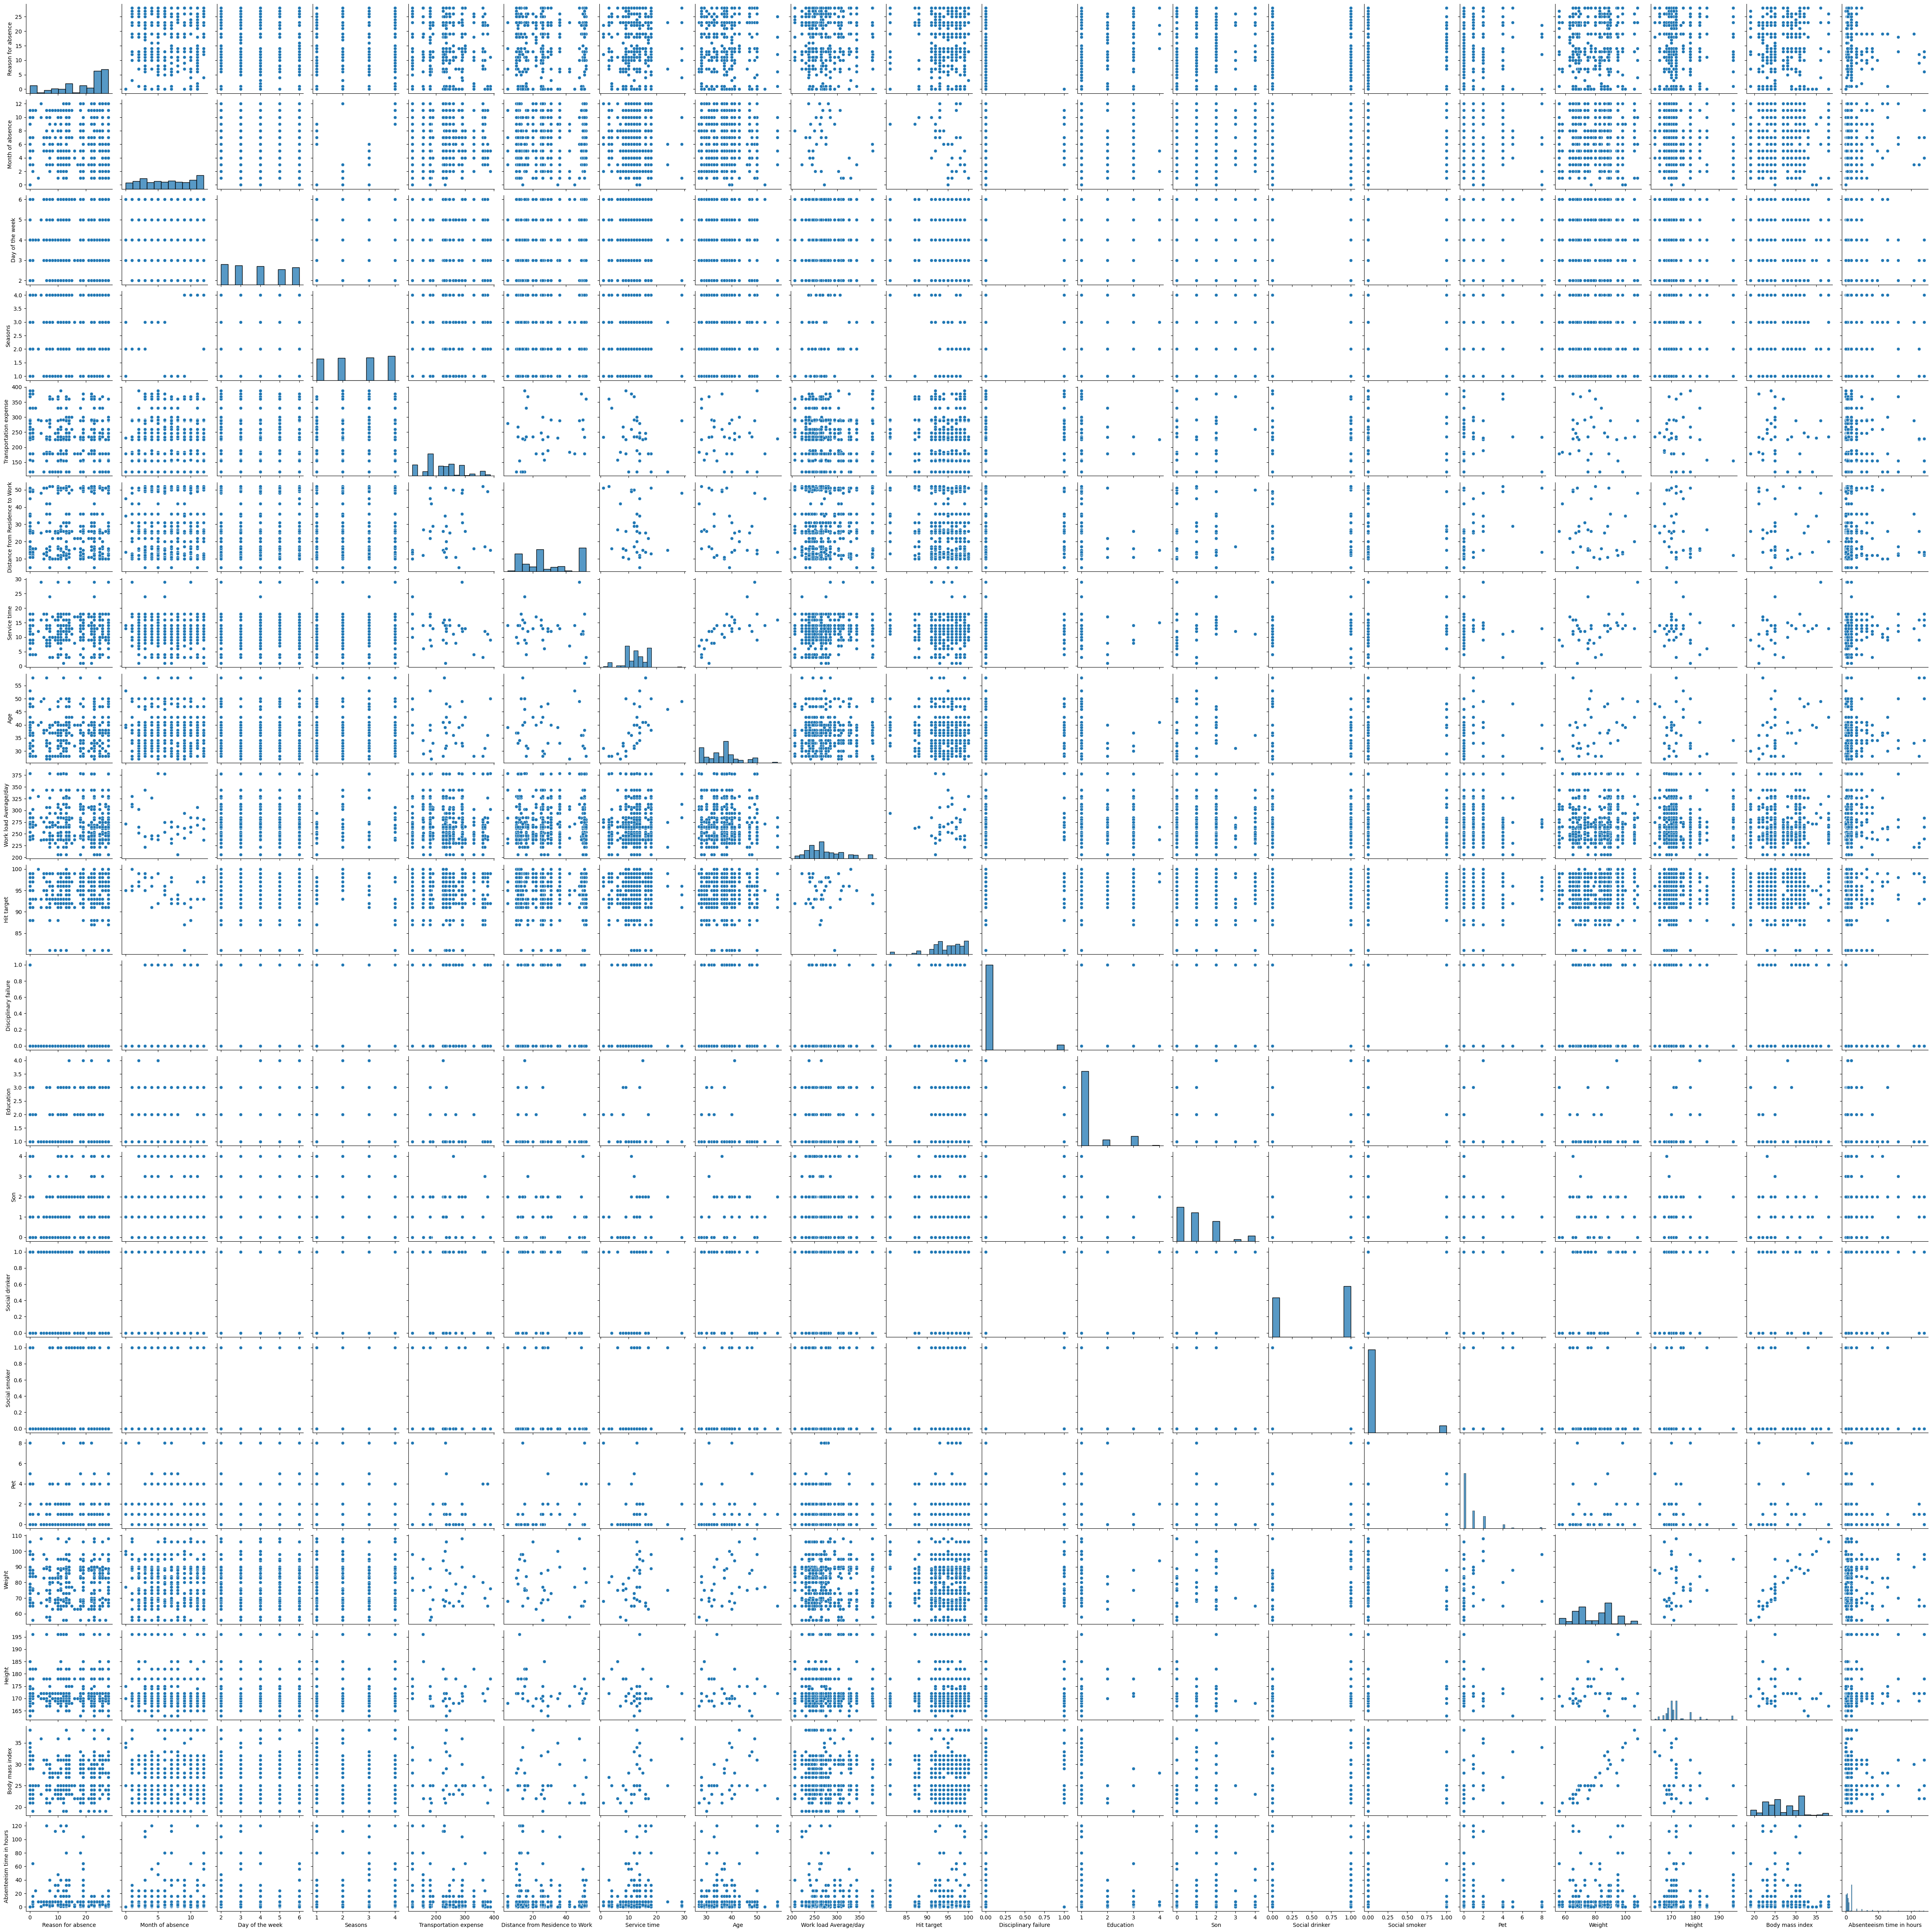

In [18]:
sns.pairplot(workdf)

In [15]:
from tabulate import tabulate
def data_type(workdf):
    cat=[]
    num=[]
    for col in workdf:
        if workdf[col].nunique()<14:
            cat.append(col)
        else:
            num.append(col)
    return cat,num

cat_var,num_var=data_type(workdf)
print(tabulate({'Categorical':cat_var,'Numerical':num_var},headers=['Categorical','Numerical']))

Categorical           Numerical
--------------------  -------------------------------
Month of absence      Reason for absence
Day of the week       Transportation expense
Seasons               Distance from Residence to Work
Hit target            Service time
Disciplinary failure  Age
Education             Work load Average/day
Son                   Weight
Social drinker        Height
Social smoker         Body mass index
Pet                   Absenteeism time in hours


In [16]:
# creating a visualization function which helps to visual each categorial values with the help of bar and pie chart
def cat_visual(col):
    value_counts= workdf[col].value_counts()
    per= workdf[col].value_counts(normalize=True)*100 #value_counts in percentage
    plt.figure(figsize=(8,6))
    plt.bar(value_counts.index,value_counts.values)
    plt.title(f"value count of{col}")
        
    
    plt.figure(figsize=(3,4))
    plt.pie(per.values,labels=per.index,autopct="%1.1f%%")
    plt.title(f"percentage of {col}")

In [17]:
# creating a function for the categorial values and print unique, missing values if any and counting the values
def cat_info(col):
    print(f"Unique values in {col} : {workdf[col].unique()}")
    print(f"Missing Value counts of {col}: {workdf[col].isnull().sum()}")
    print(f"Mode of {col}: {workdf[col].mode()[0]}")
    value_counts=workdf[col].value_counts()
    print("value counts:", value_counts)

Unique values in Month of absence : [ 7  8  9 10 11 12  1  2  3  4  5  6  0]
Missing Value counts of Month of absence: 0
Mode of Month of absence: 3
value counts: 3     83
10    69
7     65
11    62
2     62
5     61
8     54
6     54
9     52
4     50
12    46
1     45
0      3
Name: Month of absence, dtype: int64


Unique values in Day of the week : [3 4 5 6 2]
Missing Value counts of Day of the week: 0
Mode of Day of the week: 2
value counts: 2    158
3    150
4    144
6    135
5    119
Name: Day of the week, dtype: int64


Unique values in Seasons : [1 4 2 3]
Missing Value counts of Seasons: 0
Mode of Seasons: 4
value counts: 4    189
3    177
2    173
1    167
Name: Seasons, dtype: int64


Unique values in Hit target : [ 97  92  93  95  99  96  94  98  81  88 100  87  91]
Missing Value counts of Hit target: 0
Mode of Hit target: 93
value counts: 93     102
99      95
97      82
92      78
95      70
96      70
98      65
91      42
94      34
88      27
81      19
100     11
87   

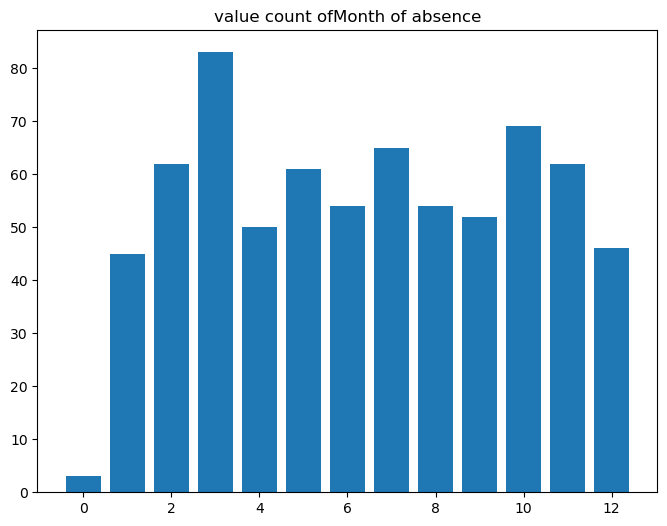

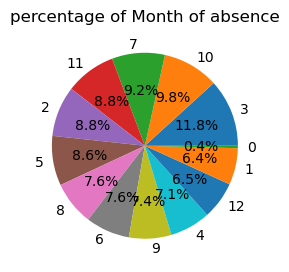

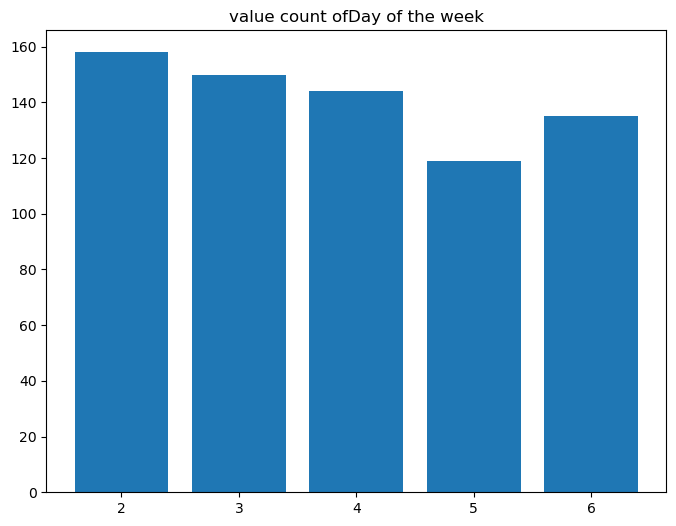

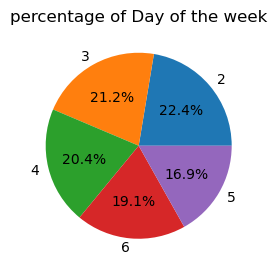

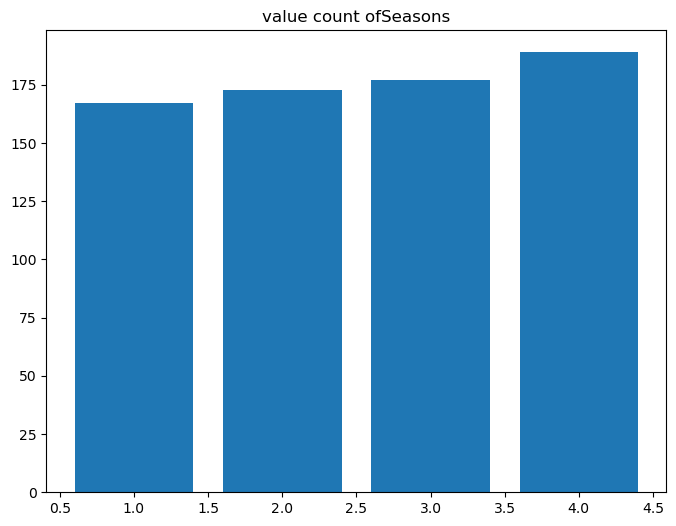

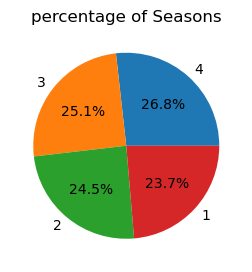

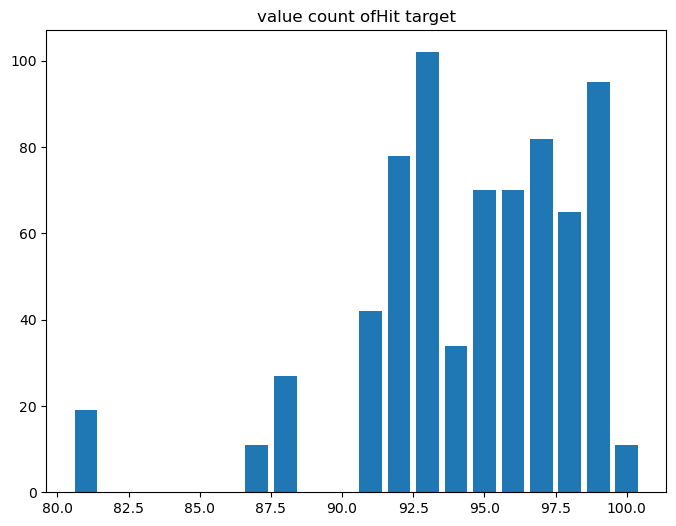

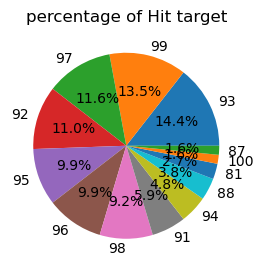

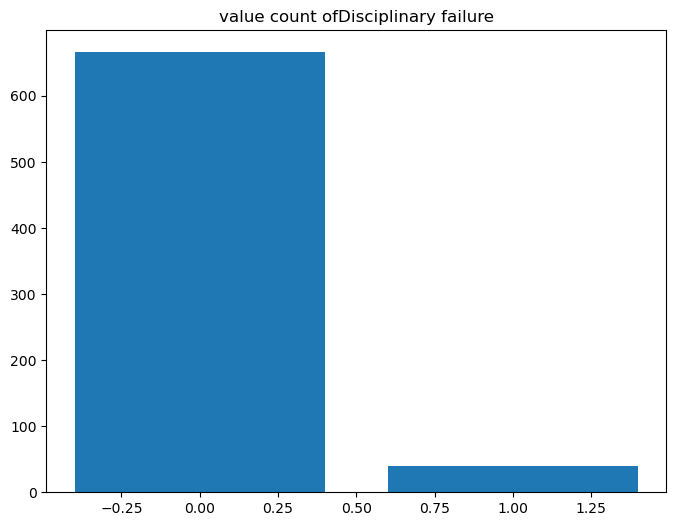

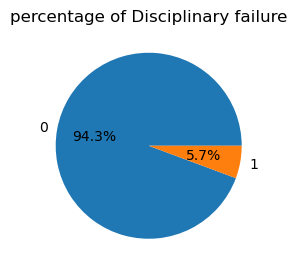

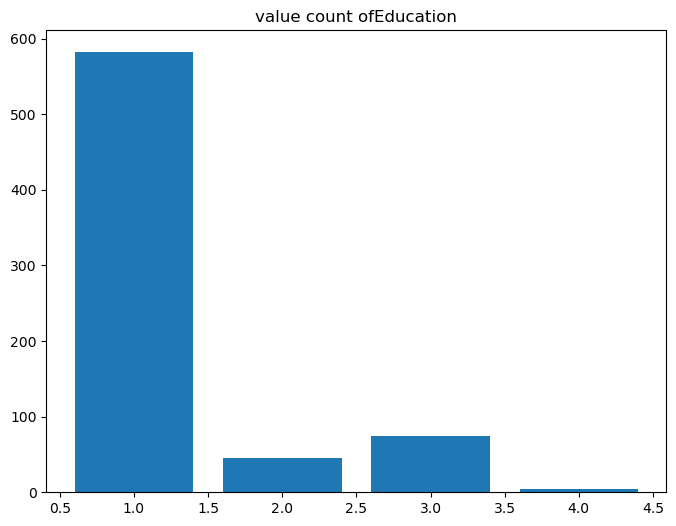

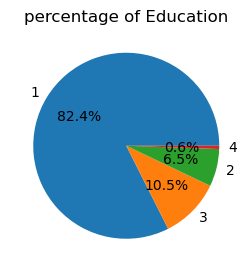

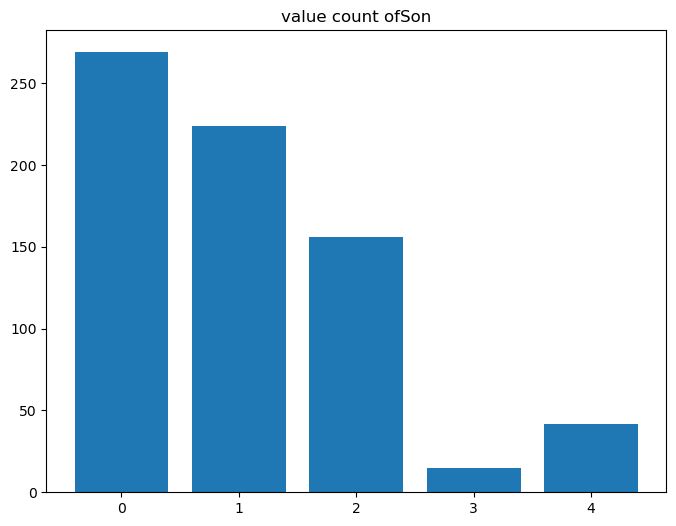

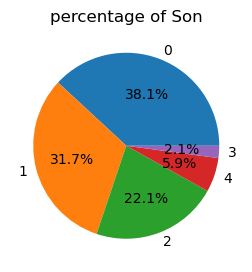

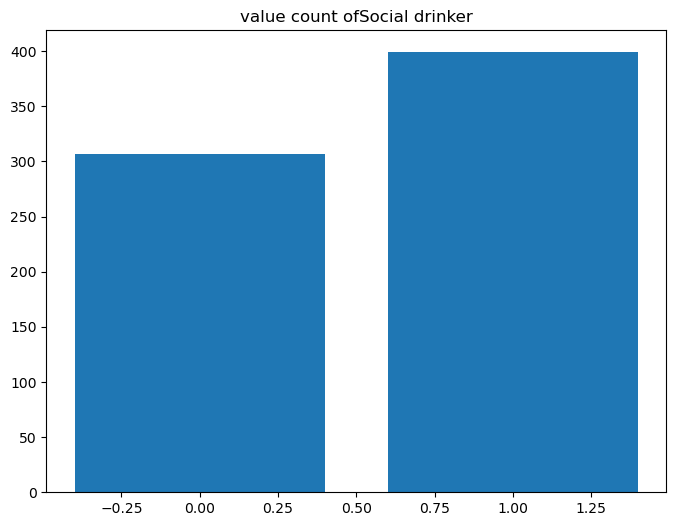

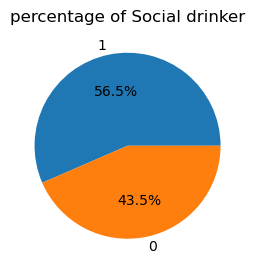

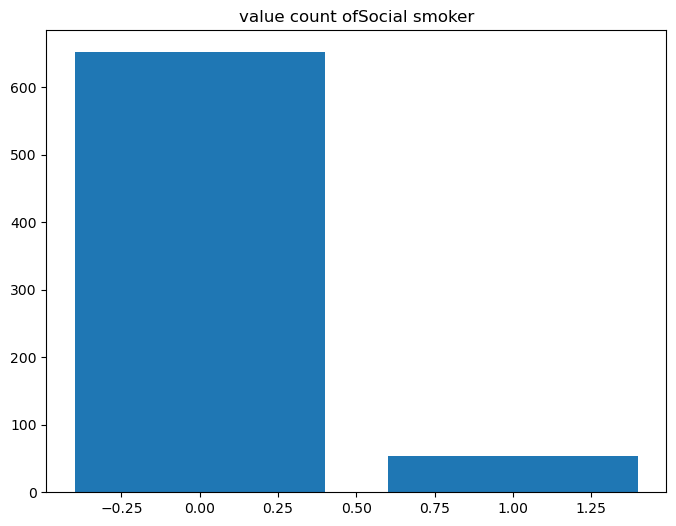

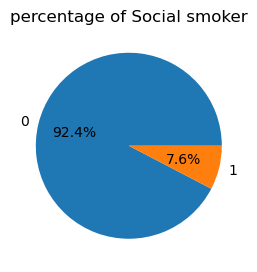

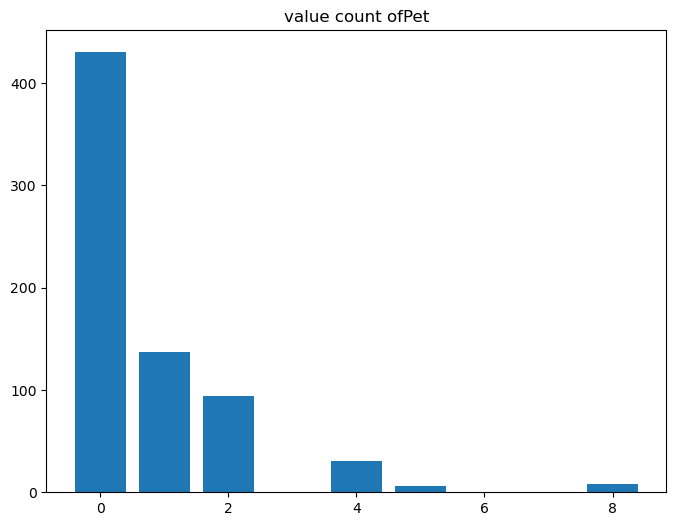

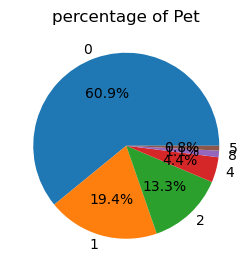

In [18]:
for col in cat_var:
    cat_info(col)
    cat_visual(col)
    print("\n")

In [19]:
# based on the features that can be categorized pie chart and bar plot is shown with the count of their respective values

In [20]:
def num_info(col):
    summary=workdf[col].describe()
    print(summary)
    print(f"median of {col}: {workdf[col].median()}")
    print(f"mode of {col}: {workdf[col].mode()[0]}")
    print(f"missing values {col}: {workdf[col].isnull().sum()}")
    print(f"skewness of {col}:{workdf[col].skew()}")
    print(f"Kurtosis of {col}: {workdf[col].kurt()}")

In [21]:
def num_visual(col):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    ax[0].hist(workdf[col])
    sns.boxplot(y=workdf[col],ax=ax[1])

count    706.000000
mean      18.882436
std        8.482877
min        0.000000
25%       13.000000
50%       23.000000
75%       26.000000
max       28.000000
Name: Reason for absence, dtype: float64
median of Reason for absence: 23.0
mode of Reason for absence: 23
missing values Reason for absence: 0
skewness of Reason for absence:-0.8558788174215977
Kurtosis of Reason for absence: -0.3675392288660779


count    706.000000
mean     222.977337
std       67.293426
min      118.000000
25%      179.000000
50%      225.000000
75%      260.000000
max      388.000000
Name: Transportation expense, dtype: float64
median of Transportation expense: 225.0
mode of Transportation expense: 179
missing values Transportation expense: 0
skewness of Transportation expense:0.3543664363530157
Kurtosis of Transportation expense: -0.3560953324203533


count    706.000000
mean      29.297450
std       14.706661
min        5.000000
25%       16.000000
50%       26.000000
75%       49.000000
max       52.0000

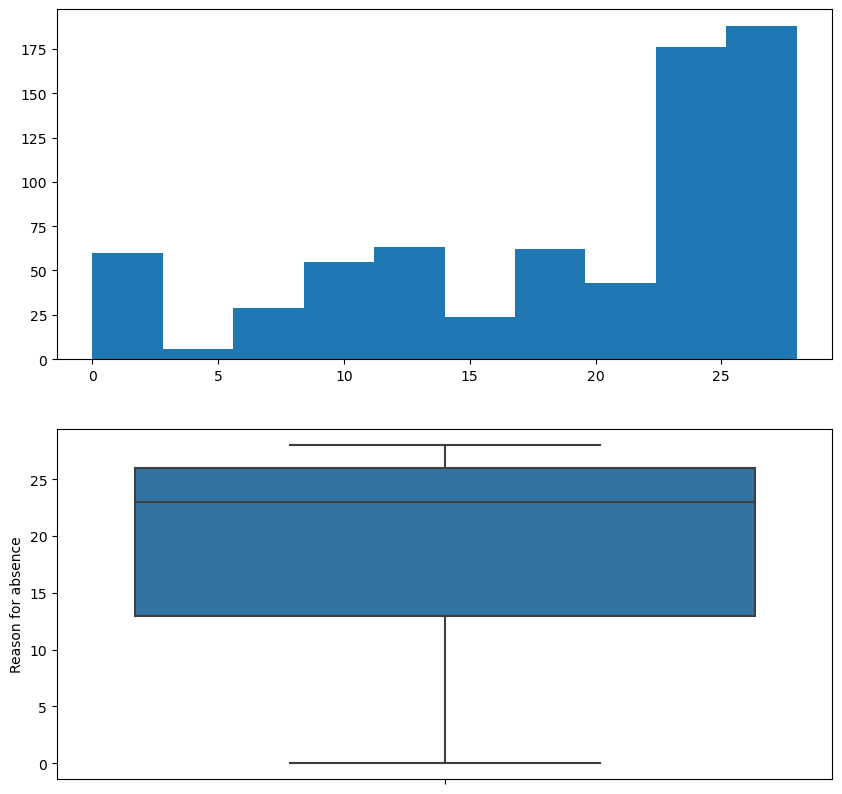

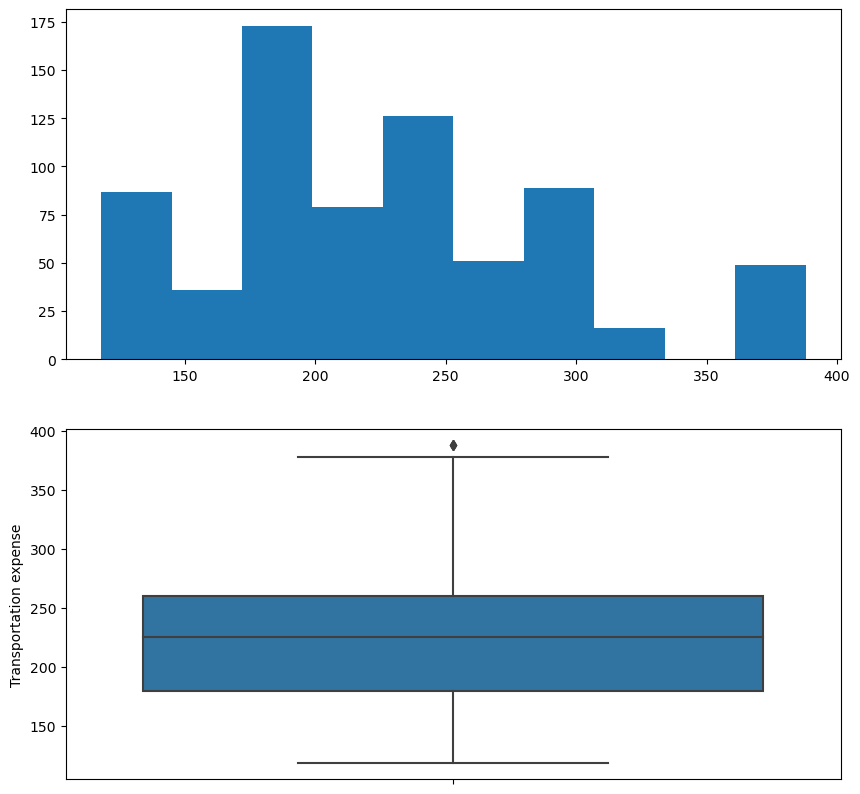

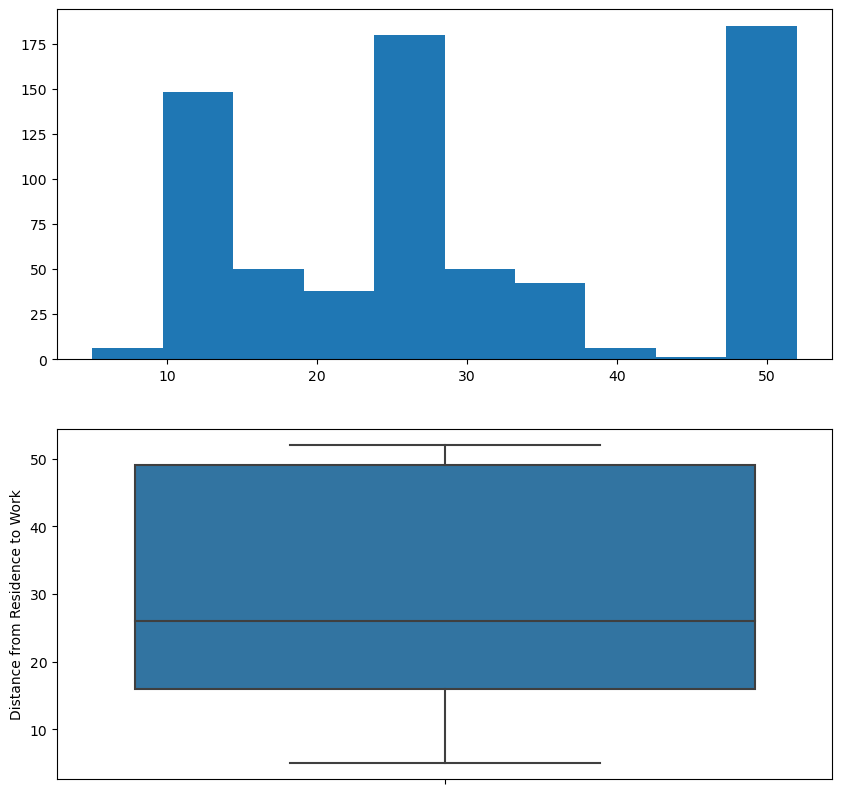

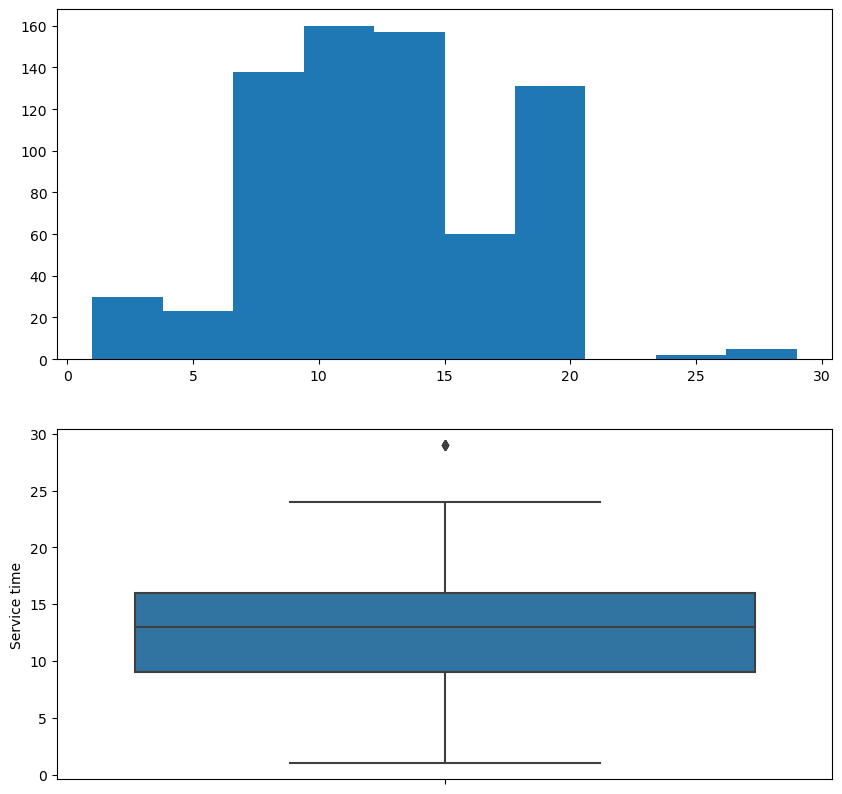

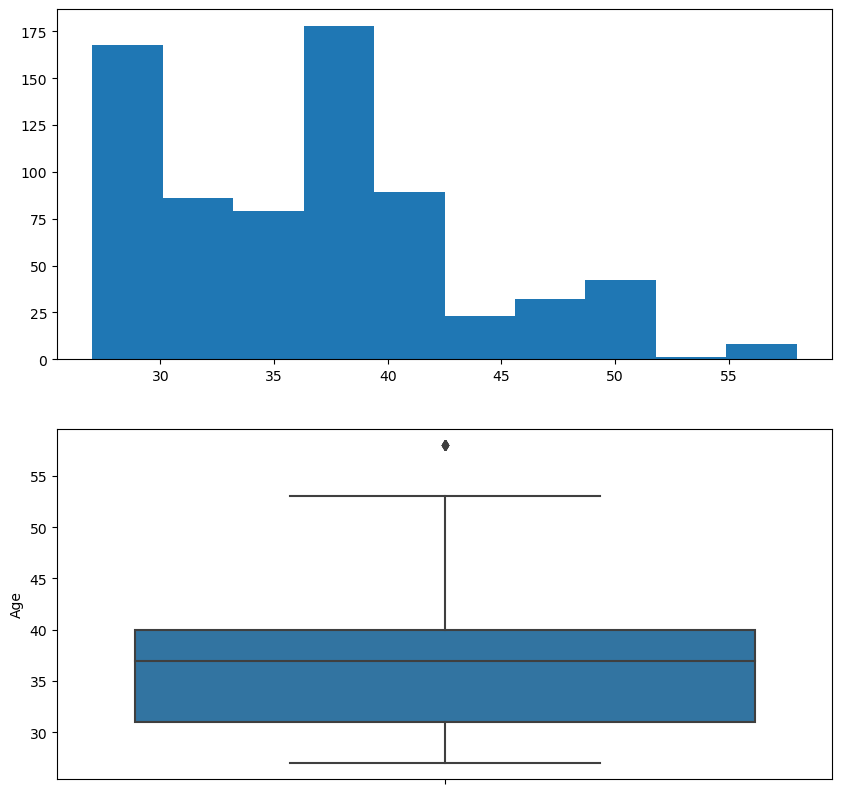

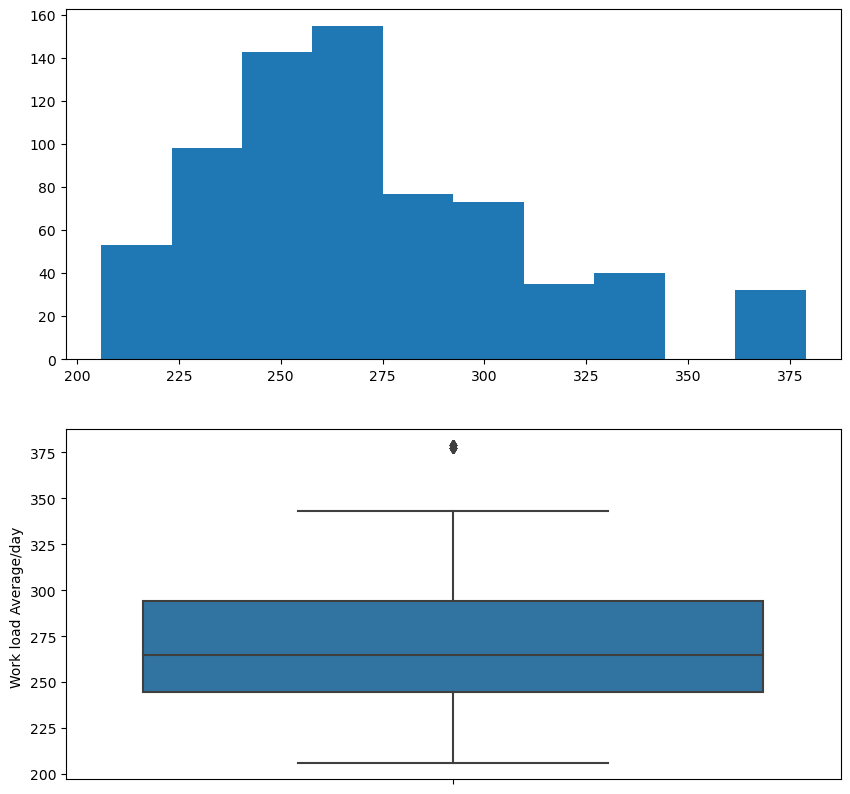

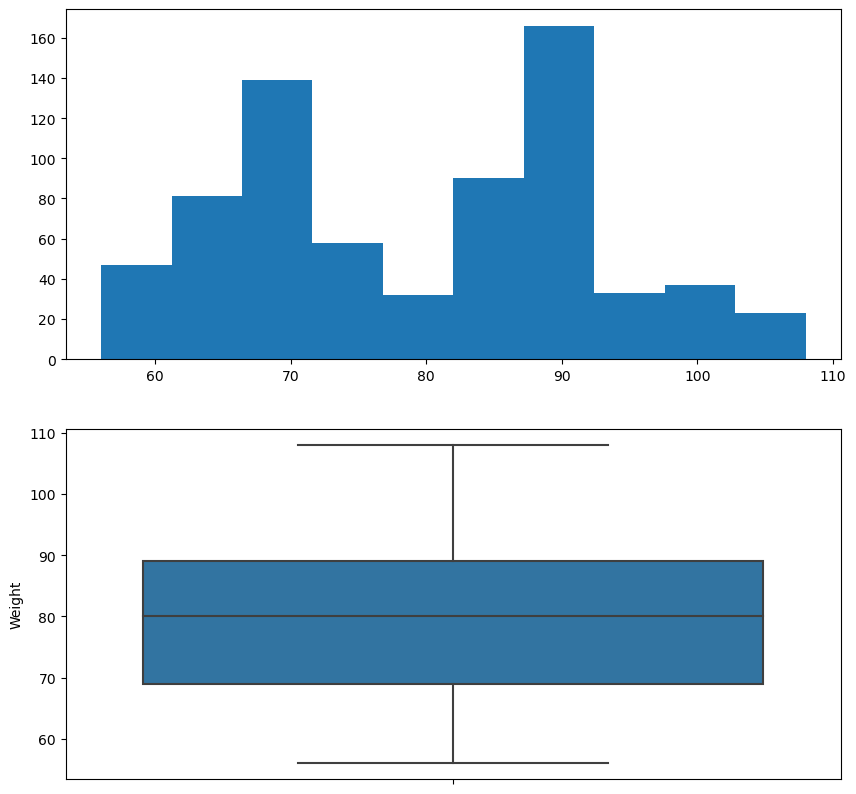

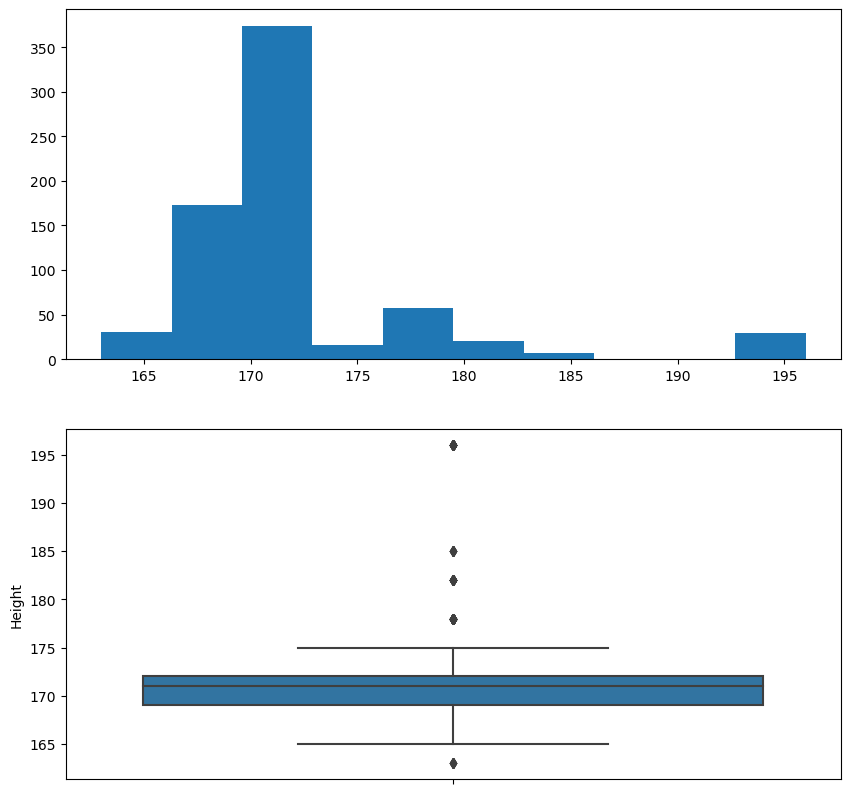

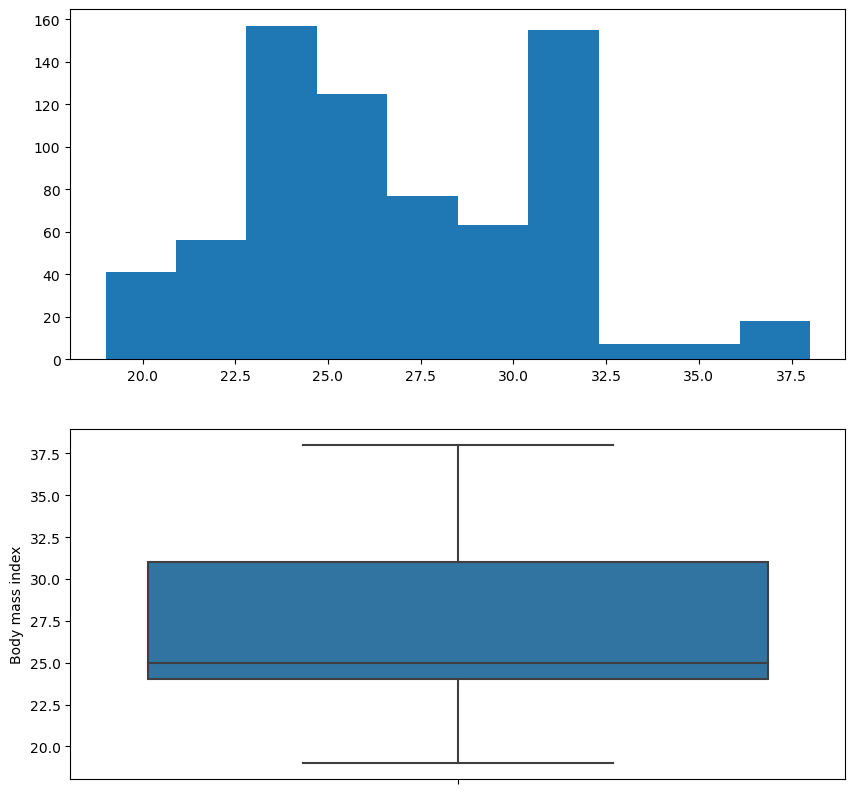

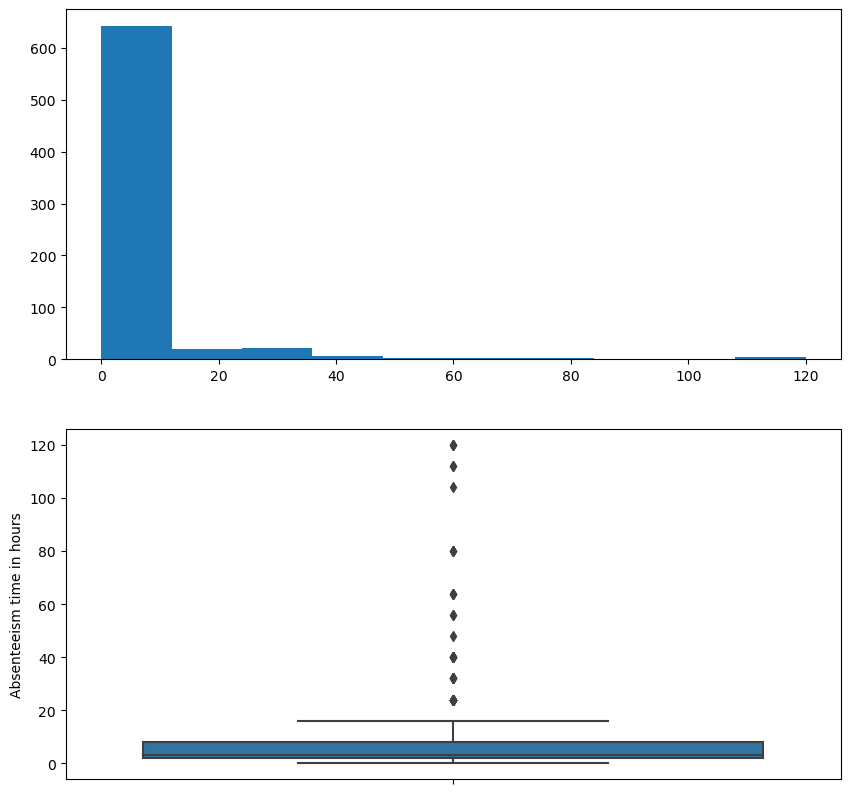

In [22]:
for col in num_var:
    num_info(col)
    num_visual(col)
    print("\n")

In [23]:
workdf['Month of absence'].value_counts()

3     83
10    69
7     65
11    62
2     62
5     61
8     54
6     54
9     52
4     50
12    46
1     45
0      3
Name: Month of absence, dtype: int64

In [24]:
workdf = workdf[workdf['Month of absence'] != 0]

In [25]:
workdf['Month of absence'].value_counts()

3     83
10    69
7     65
11    62
2     62
5     61
8     54
6     54
9     52
4     50
12    46
1     45
Name: Month of absence, dtype: int64

In [26]:
wrk_df = workdf.copy()

Text(0.5, 1.0, 'Absent time with Social smoker')

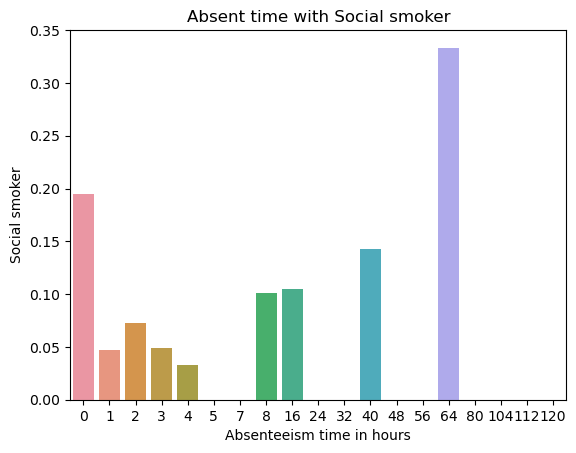

In [27]:
sns.barplot(y='Social smoker',x='Absenteeism time in hours',data=workdf,ci=None)
plt.title('Absent time with Social smoker')

In [28]:
# most of the employees with high absenteesim time are Smokers .

Text(0.5, 1.0, 'Absent time with respect to Month')

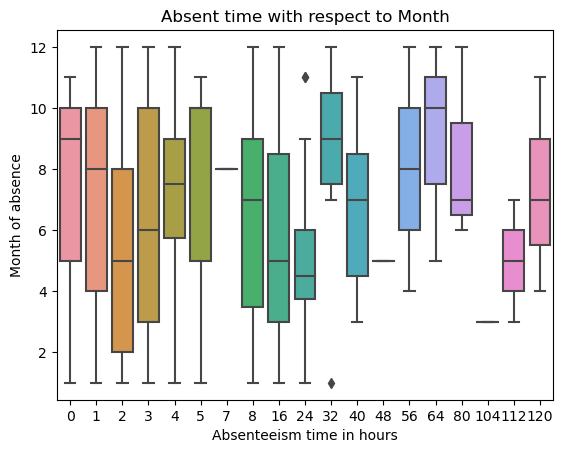

In [29]:
sns.boxplot(y='Month of absence',x='Absenteeism time in hours',data=workdf)
plt.title('Absent time with respect to Month')

In [30]:
# the employees with the highest absenteeism time were absent between the month 6 to 9.

Text(0.5, 1.0, 'Absent time in Seasons')

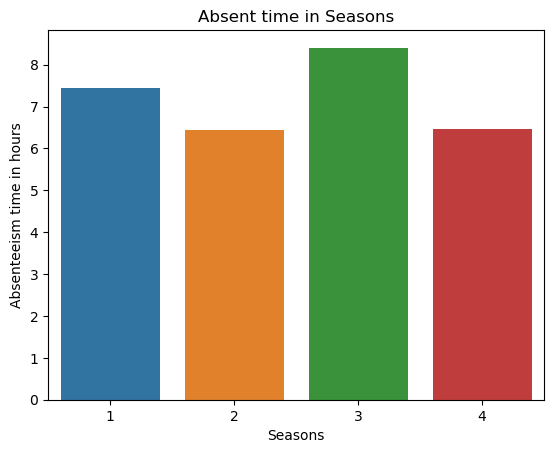

In [31]:
sns.barplot(x='Seasons',y='Absenteeism time in hours',data=workdf,ci=None)
plt.title('Absent time in Seasons')

In [32]:
# most of the employees were absent in season 3.

Text(0.5, 1.0, 'Absent time with respect to expense in Transportation')

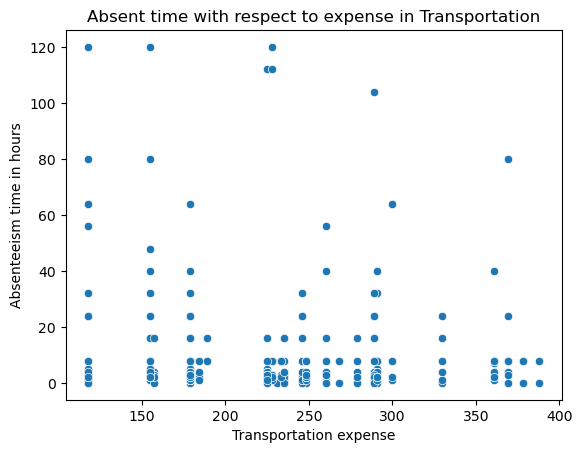

In [33]:
sns.scatterplot(x='Transportation expense',y='Absenteeism time in hours',data=workdf)
plt.title('Absent time with respect to expense in Transportation')

In [34]:
# for employees with maximum absenteeism time have transportation expense of approx. 250.

In [35]:
workdf = workdf[workdf['Reason for absence'] != 0]

Text(0.5, 1.0, 'Reason with Absent time ')

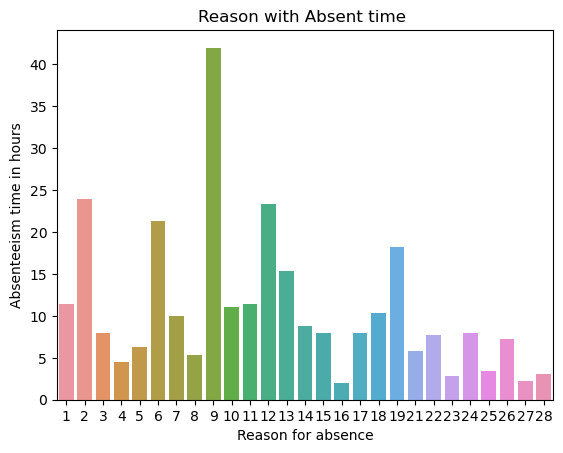

In [36]:
sns.barplot(x='Reason for absence',y='Absenteeism time in hours',data=workdf,ci=None)
plt.title('Reason with Absent time ')

In [37]:
# for 9 reason of absence the absent time is maximum.

Text(0.5, 1.0, 'Service with respect to Absent time')

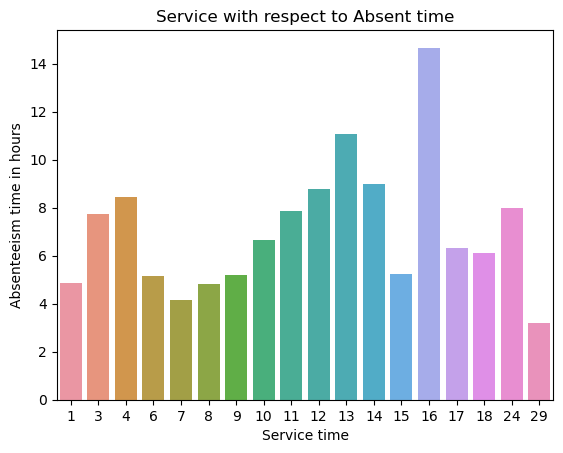

In [38]:
sns.barplot(x='Service time',y='Absenteeism time in hours',data=workdf,ci=None)
plt.title('Service with respect to Absent time')

In [39]:
# service time for 16 shows the maximum absent time in hours.

In [40]:
# multicorrlinearity in the data

In [41]:
# scaling

In [42]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize

In [43]:
scale_df =pd.DataFrame(normalize(StandardScaler().fit_transform(workdf)),columns=workdf.columns)

In [44]:
scale_df

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,0.273953,0.063820,-0.208371,-0.453627,0.341880,0.148338,0.038838,-0.169872,-0.273791,0.211110,0.0,-0.148462,0.290398,0.298013,-0.091440,0.064356,0.298093,-0.012197,0.280470,-0.086847
1,0.117504,0.055761,0.021835,-0.396342,-0.187678,0.427761,0.364788,0.078105,-0.239216,0.184451,0.0,-0.129714,-0.276102,0.260379,-0.079893,-0.169709,0.237376,-0.104862,0.315598,-0.117961
2,-0.345310,0.036167,0.146410,-0.257073,0.165066,-0.315604,0.064929,0.080046,-0.155159,0.119637,0.0,-0.084134,0.164570,0.168886,0.695062,-0.110076,-0.160308,-0.129118,-0.115602,-0.049217
3,0.136058,0.064565,0.261369,-0.458924,0.345872,0.150070,0.039292,-0.171856,-0.276988,0.213575,0.0,-0.150196,0.293789,0.301493,-0.092508,0.065108,0.301574,-0.012339,0.283745,-0.136587
4,0.107984,0.051243,0.394812,-0.364231,-0.172473,0.393104,0.335233,0.071777,-0.219835,0.169507,0.0,-0.119205,-0.253733,0.239284,-0.073420,-0.155960,0.218144,-0.096366,0.290029,-0.108404
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658,0.055266,0.040081,0.015695,-0.284891,0.443549,0.321763,-0.451246,-0.269512,-0.038555,-0.096479,0.0,-0.093239,-0.008042,0.187161,-0.057427,0.527632,0.021363,-0.007660,0.024016,0.005954
659,0.091730,0.066526,0.026050,-0.472860,0.018754,-0.082518,-0.275299,-0.447334,-0.063993,-0.160136,0.0,-0.154757,-0.013348,-0.392287,-0.095318,0.336643,-0.267344,-0.181303,-0.212638,0.009882
660,-0.149214,0.028822,-0.199495,-0.204866,0.337242,-0.128219,-0.016663,-0.123553,-0.027725,-0.069379,0.0,-0.067048,0.268081,0.134588,-0.041296,-0.087722,-0.103900,-0.078549,-0.055660,0.787336
661,-0.298284,0.067051,-0.218921,-0.476594,0.359190,0.155848,0.040805,-0.178473,-0.064498,-0.161400,0.0,-0.155979,0.305101,0.313101,-0.096070,0.067614,0.313186,-0.012815,0.294670,0.009960


# PCA

In [45]:
from sklearn.decomposition import PCA

In [46]:
pca=PCA()
pca.fit(scale_df)
features=range(pca.n_components_) #no. of principle components  
transformed_data=pca.transform(scale_df)

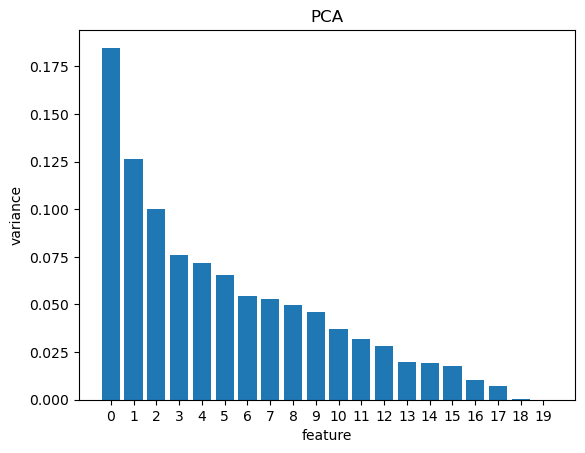

In [47]:
plt.bar(features,pca.explained_variance_ratio_)
plt.xlabel('feature')
plt.ylabel('variance')
plt.xticks(features)
plt.title("PCA")
plt.show()

In [48]:
pca2=PCA(n_components=2)
transformed_data2=pca2.fit_transform(scale_df)
transformed_data2.shape

(663, 2)

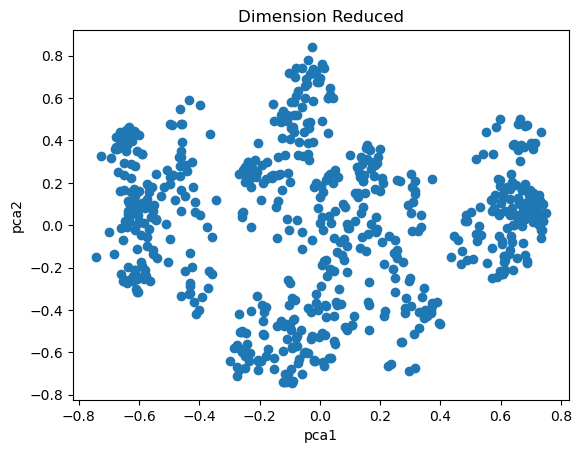

In [49]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1])
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('Dimension Reduced')
plt.show()

# KMeans Clustering

In [50]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples

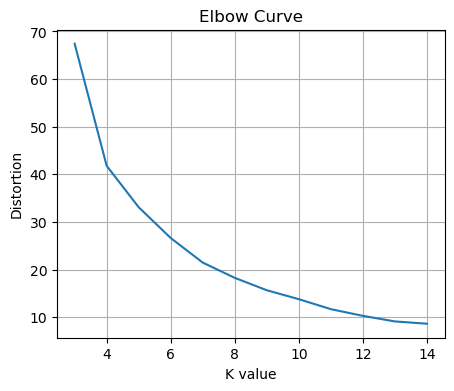

In [51]:
distortion=[]
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    distortion.append(model.inertia_) # how much distance (WSS)
    
plt.figure(figsize=(5,4))
plt.grid(True)
plt.plot(range(3,15),distortion)
plt.ylabel('Distortion')
plt.xlabel('K value')
plt.title("Elbow Curve")
plt.show()

In [52]:
for i in range(3,15):
    model=KMeans(n_clusters=i).fit(transformed_data2)
    model.predict(transformed_data2)
    score=silhouette_score(transformed_data2,model.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.4435649689301736
k: 4 score 0.4941450237702223
k: 5 score 0.46748677711018954
k: 6 score 0.45754727156231384
k: 7 score 0.4665343532857623
k: 8 score 0.4696824448848866
k: 9 score 0.43785588552882965
k: 10 score 0.45305470238918666
k: 11 score 0.47432834937678536
k: 12 score 0.4821133444980135
k: 13 score 0.4677723680952313
k: 14 score 0.4689395174718808


In [53]:
kmodel = KMeans(n_clusters=4).fit(transformed_data2)

In [56]:
labelk=kmodel.labels_

In [58]:
labelk

array([0, 1, 3, 0, 1, 0, 0, 3, 3, 0, 0, 0, 1, 1, 3, 1, 2, 1, 2, 1, 0, 0,
       0, 0, 0, 3, 0, 1, 1, 3, 3, 3, 1, 0, 0, 0, 0, 0, 2, 3, 1, 1, 3, 3,
       1, 0, 0, 0, 2, 3, 2, 1, 0, 1, 0, 1, 3, 2, 1, 2, 2, 1, 0, 1, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 2, 0, 3, 2, 0, 3, 2, 2, 2, 0, 1, 2, 0, 0,
       1, 3, 1, 3, 2, 0, 3, 0, 2, 0, 2, 3, 0, 2, 2, 3, 3, 3, 2, 2, 2, 2,
       3, 2, 3, 3, 3, 3, 2, 0, 3, 2, 0, 2, 3, 1, 3, 2, 0, 0, 3, 3, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 0, 0, 3, 3, 0, 0, 2, 3, 0, 3, 3, 0, 3, 0, 3,
       0, 2, 3, 1, 2, 2, 2, 2, 2, 1, 3, 2, 3, 2, 0, 2, 3, 3, 3, 2, 0, 1,
       1, 0, 3, 0, 1, 0, 0, 3, 0, 0, 3, 0, 3, 3, 1, 2, 2, 3, 1, 0, 1, 1,
       0, 3, 0, 3, 0, 3, 1, 3, 3, 1, 3, 1, 1, 0, 1, 1, 2, 3, 1, 3, 3, 2,
       2, 3, 2, 2, 3, 0, 0, 1, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 1, 2, 2, 1,
       1, 3, 1, 3, 0, 2, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       3, 0, 0, 2, 3, 0, 1, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 3, 1, 1,
       0, 0, 0, 3, 1, 3, 3, 3, 1, 0, 0, 3, 1, 0, 0,

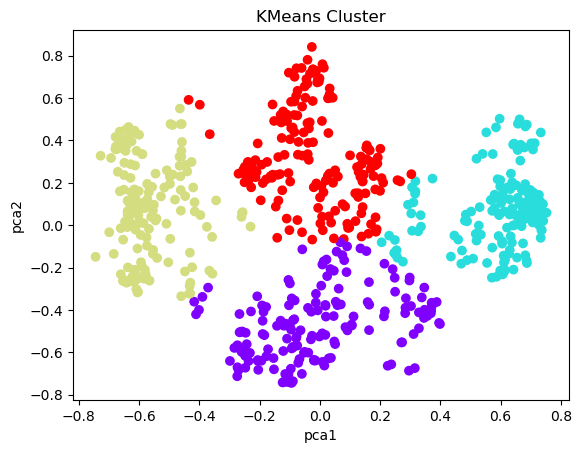

In [55]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=kmodel.labels_,cmap='rainbow')
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('KMeans Cluster')
plt.show()

# Agglomerative Clustering

Text(0, 0.5, 'Euclidean distance')

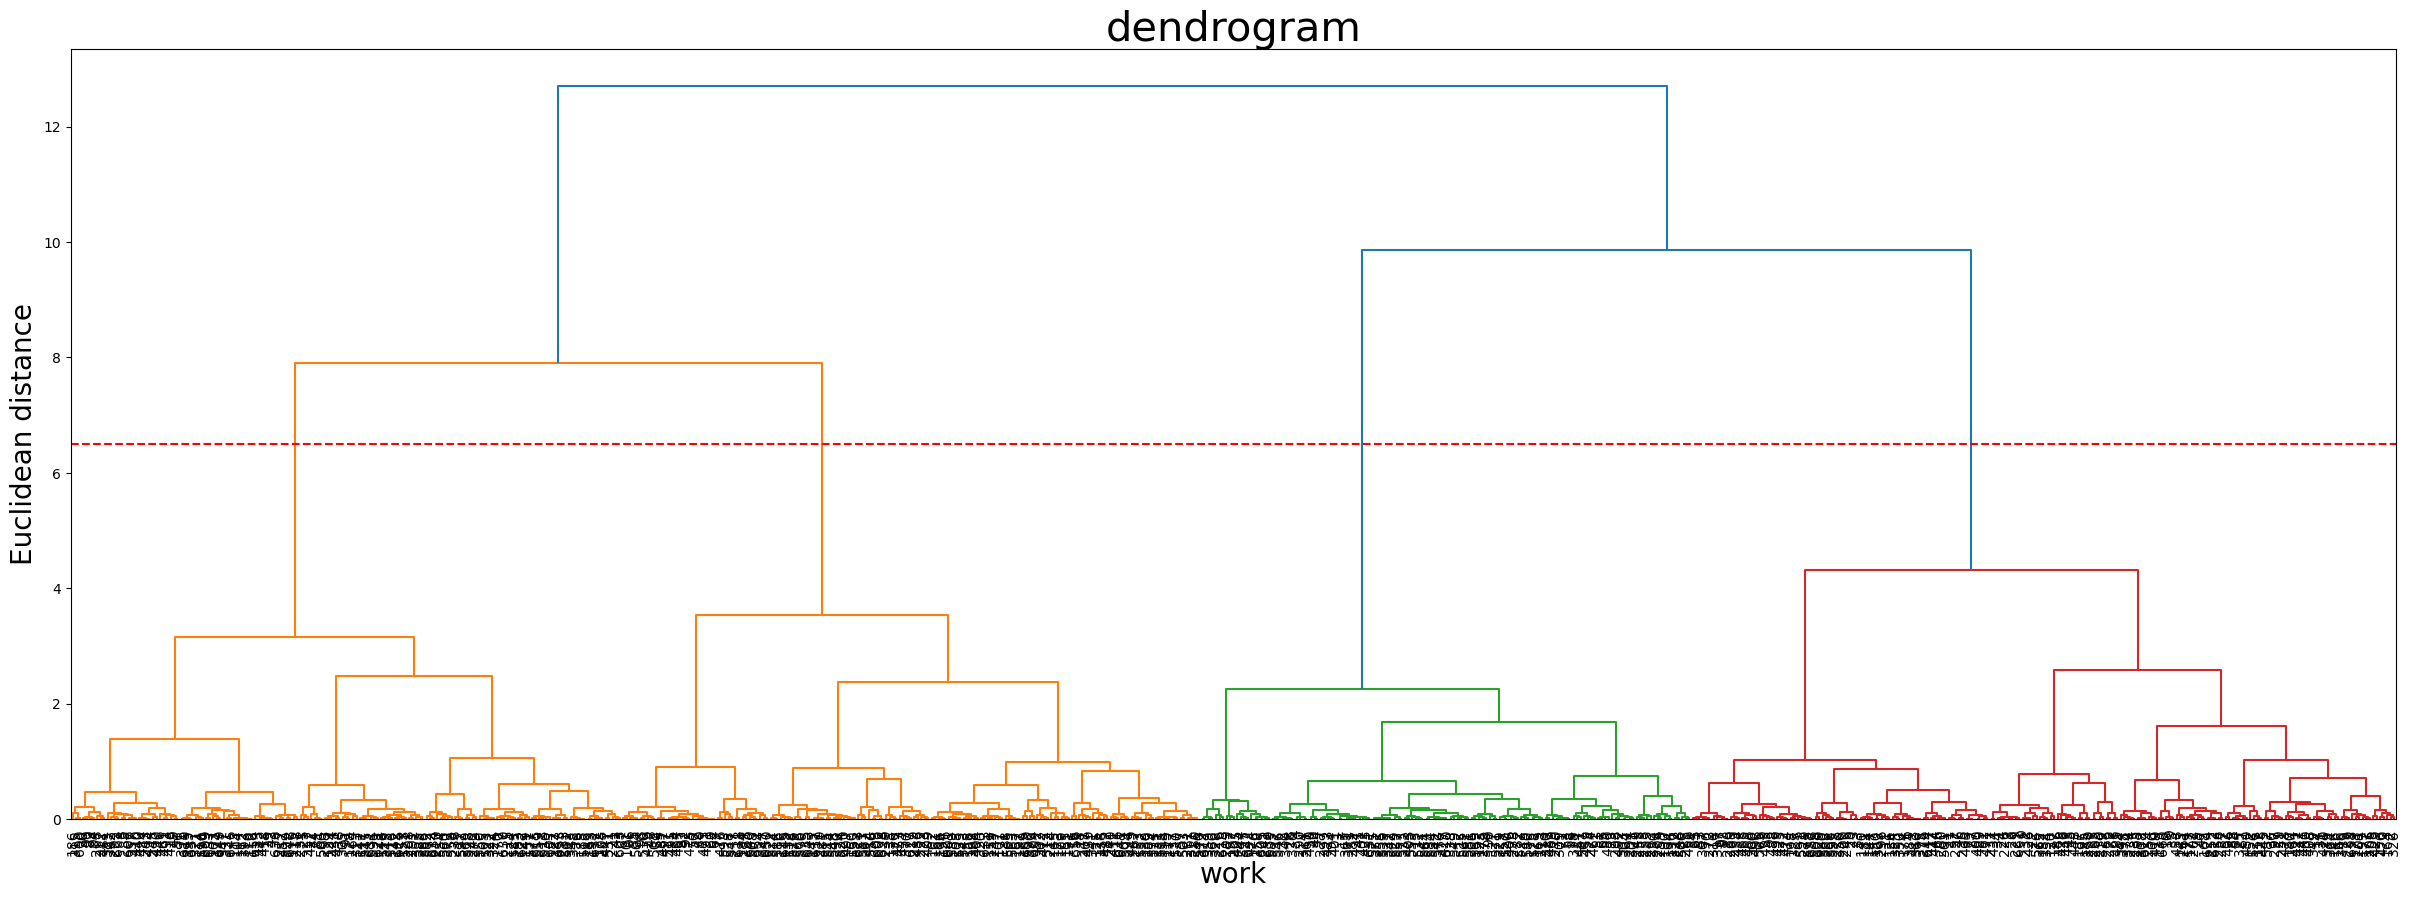

In [59]:
from scipy.cluster.hierarchy import dendrogram,linkage

plt.figure(figsize=(30,10))
dendrogram = dendrogram(linkage(transformed_data2,method='ward',metric='euclidean'))
plt.axhline(y=6.5,color='r',linestyle ='--')
ax=plt.gca()
ax.tick_params(axis='x',which='major',labelsize=10)
plt.title('dendrogram',fontsize=30)
plt.xlabel('work',fontsize=20)
plt.ylabel('Euclidean distance',fontsize=20)

In [60]:
from sklearn.cluster import AgglomerativeClustering

In [61]:
for i in range(3,15):
    amodel=AgglomerativeClustering(n_clusters=i).fit(transformed_data2)
    amodel.fit_predict(transformed_data2)
    score=silhouette_score(transformed_data2,amodel.labels_,metric="euclidean")
    print("k:",i,"score",score)

k: 3 score 0.42215330720666877
k: 4 score 0.4739277235636329
k: 5 score 0.4538218793486918
k: 6 score 0.44410317663103266
k: 7 score 0.4319441070748
k: 8 score 0.44390144720214636
k: 9 score 0.4388309619822771
k: 10 score 0.4543965485259421
k: 11 score 0.4528635930147802
k: 12 score 0.4517372668674425
k: 13 score 0.44840490714939213
k: 14 score 0.4449274243239397


In [62]:
hc = AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='ward')

In [63]:
y_hc = hc.fit_predict(transformed_data2)

In [64]:
y_hc

array([0, 2, 0, 0, 2, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 2, 1, 3, 1, 2, 0, 0,
       0, 0, 0, 3, 0, 2, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 1, 3, 2, 2, 3, 3,
       2, 0, 0, 0, 1, 3, 1, 2, 0, 2, 0, 2, 3, 1, 2, 1, 1, 0, 0, 2, 1, 0,
       0, 1, 0, 0, 0, 2, 1, 2, 3, 0, 3, 1, 0, 0, 1, 3, 1, 0, 0, 1, 0, 0,
       0, 3, 2, 3, 1, 0, 3, 0, 1, 0, 1, 3, 0, 1, 1, 3, 3, 3, 1, 1, 1, 1,
       3, 1, 3, 3, 3, 3, 1, 0, 3, 1, 0, 1, 3, 2, 3, 1, 0, 0, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 3, 3, 0, 0, 1, 0, 0, 3, 3, 0, 3, 0, 3,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 2, 0, 1, 0, 1, 0, 1, 3, 0, 3, 1, 0, 2,
       2, 0, 0, 0, 0, 0, 0, 3, 1, 0, 3, 0, 3, 3, 2, 1, 1, 3, 2, 0, 2, 2,
       0, 0, 0, 0, 0, 0, 2, 3, 0, 2, 3, 2, 3, 1, 2, 2, 1, 3, 2, 3, 3, 1,
       1, 3, 1, 1, 3, 0, 0, 2, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 3, 1, 1, 2,
       3, 3, 2, 3, 0, 1, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 0,
       3, 0, 0, 1, 3, 0, 2, 1, 0, 0, 2, 2, 0, 1, 2, 0, 1, 1, 2, 3, 0, 2,
       0, 0, 1, 0, 2, 3, 3, 3, 2, 0, 0, 0, 2, 0, 0,

Text(0, 0.5, 'pca2')

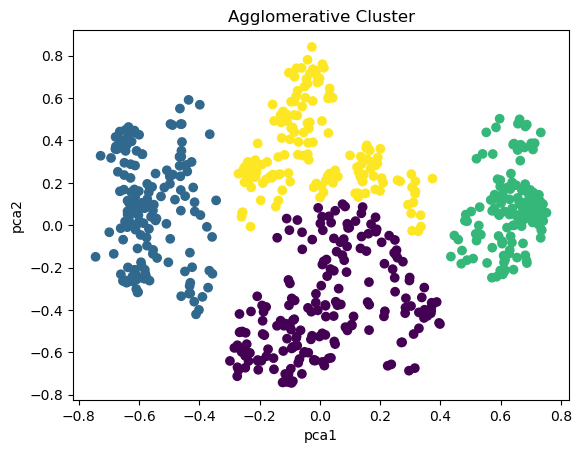

In [65]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=y_hc)
plt.title('Agglomerative Cluster')
plt.xlabel('pca1')
plt.ylabel('pca2')

# DBSCAN Clustering

In [66]:
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN

In [67]:
neighbours=NearestNeighbors(n_neighbors=5)
neigh_fit = neighbours.fit(transformed_data2)
distance, index=neigh_fit.kneighbors(transformed_data2)

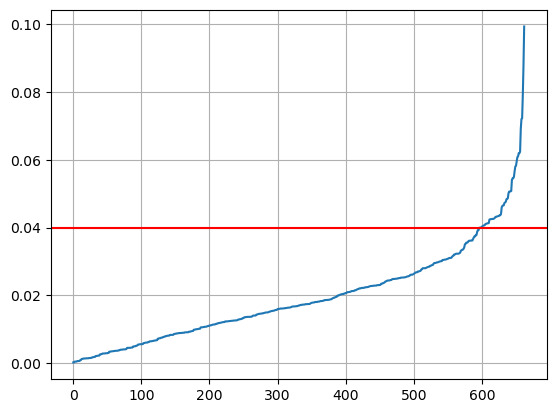

In [68]:
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.plot(distances)
plt.axhline(y=0.04,color='r')
plt.grid()
plt.show()

In [69]:
eps=0.04
for i in range(3,15):
    db=DBSCAN(eps=eps,min_samples=i)
    db.fit(transformed_data2)
    labels=db.labels_
    
    new_labels=labels+2
    y=np.bincount(new_labels)
    z=np.nonzero(y)[0]
    cluster=list(zip(z,y[z]))
    print('min_sample:',i,'cluster:',cluster)
    score=silhouette_score(transformed_data2,new_labels,metric='euclidean')
    print(f'score = {score}')
    print(' ')

min_sample: 3 cluster: [(1, 125), (2, 13), (3, 77), (4, 22), (5, 40), (6, 18), (7, 21), (8, 3), (9, 4), (10, 3), (11, 25), (12, 4), (13, 4), (14, 6), (15, 5), (16, 9), (17, 27), (18, 51), (19, 5), (20, 3), (21, 7), (22, 8), (23, 5), (24, 27), (25, 26), (26, 5), (27, 23), (28, 11), (29, 3), (30, 7), (31, 8), (32, 5), (33, 4), (34, 3), (35, 10), (36, 7), (37, 3), (38, 3), (39, 3), (40, 4), (41, 3), (42, 5), (43, 3), (44, 3), (45, 5), (46, 3), (47, 4)]
score = 0.1787182407277636
 
min_sample: 4 cluster: [(1, 174), (2, 77), (3, 13), (4, 22), (5, 30), (6, 17), (7, 4), (8, 25), (9, 4), (10, 6), (11, 5), (12, 9), (13, 27), (14, 10), (15, 5), (16, 6), (17, 5), (18, 27), (19, 4), (20, 46), (21, 18), (22, 5), (23, 23), (24, 10), (25, 3), (26, 7), (27, 6), (28, 8), (29, 4), (30, 2), (31, 4), (32, 5), (33, 9), (34, 7), (35, 16), (36, 4), (37, 3), (38, 5), (39, 4), (40, 4)]
score = 0.14863737467060545
 
min_sample: 5 cluster: [(1, 251), (2, 76), (3, 11), (4, 18), (5, 11), (6, 15), (7, 11), (8, 22),

In [70]:
db=DBSCAN(eps=eps,min_samples=3)
db.fit(transformed_data2)
labels=db.labels_

Text(0.5, 1.0, 'DBSCAN')

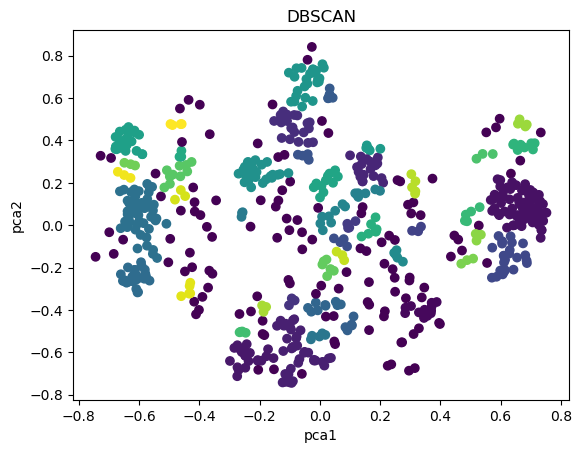

In [71]:
plt.scatter(transformed_data2[:,0],transformed_data2[:,1],c=labels)
plt.xlabel('pca1')
plt.ylabel('pca2')
plt.title('DBSCAN')

In [72]:
labels

array([ 0,  1, -1,  0,  1,  2,  3,  4,  5,  6,  6,  3,  1,  1,  7,  1, -1,
        8, -1,  1, -1,  3, -1, -1,  0, -1,  0,  9,  1, 10, 11,  7,  1, -1,
        0,  6, 10,  3, 16, 12,  1,  1,  4, 12,  1, 13,  3, 14, 15,  5, 15,
        9, -1,  9,  3,  9,  5, 16,  9, 15, 15, 21,  3,  9, 15,  3, 17, 15,
       -1,  2,  3,  9, 15, -1, 18,  3, 19, -1, 14, 20, 15, 18, 15,  3, 21,
       15, -1,  3, 21, 11, -1, 22, 15,  3, 11,  2, 15,  3, 15, 11, 41, 15,
       16, -1, 23, 24, 16, 16, 16, 16, 23, 16, 23, 23, 23, 23, 25, -1, 23,
       16, -1, 16, 26,  1,  4, -1,  3, -1, 22, 22, -1, 16, 25, 16, 16, 27,
       27, 16, -1, -1,  3, 22, 22, -1,  3, 25, 28,  3, 22,  4,  3,  4, -1,
       22,  3, 16, -1,  1, 16, 16, 25, 16, 16,  1, -1, 16, 28, 16, 14, -1,
        4, 20,  4, 16,  3,  1, 29, 14, 20, 14, -1,  3,  0,  4, -1, -1, -1,
       -1, 19,  4, -1, 16, 16,  4, 30, -1, 30, 32,  2, 20, 31, 20, 14, -1,
       30,  4, 20, 32, 22, 32, -1, -1, -1,  1, -1,  4, -1, 23, 23, 33, 25,
        4, 33, 33, 22, 31

In [73]:
Kmscore=silhouette_score(transformed_data2,kmodel.labels_,metric='euclidean')
Hiscore=silhouette_score(transformed_data2,hc.labels_,metric='euclidean')
DBscore=silhouette_score(transformed_data2,db.labels_,metric='euclidean')
print('Silhoute scores')
print('--'*30)
print('Kmean      : ',Kmscore)
print('Hirachical : ',Hiscore)
print('DBSCAN     : ',DBscore)

Silhoute scores
------------------------------------------------------------
Kmean      :  0.4941450237702223
Hirachical :  0.4739277235636329
DBSCAN     :  0.1787182407277636


In [76]:
workdf['clusters']=labelk

In [77]:
workdf

,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,Hit target,...,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours,clusters
0,26,7,3,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,4,0
2,23,7,4,1,179,51,18,38,239.554,97,...,1,0,1,0,0,89,170,31,2,1
3,7,7,5,1,279,5,14,39,239.554,97,...,1,2,1,1,0,68,168,24,4,3
4,23,7,5,1,289,36,13,33,239.554,97,...,1,2,1,0,1,90,172,30,2,0
5,23,7,6,1,179,51,18,38,239.554,97,...,1,0,1,0,0,89,170,31,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
732,22,7,4,1,361,52,3,28,264.604,93,...,1,1,1,0,4,80,172,27,8,0
733,22,7,4,1,225,26,9,28,264.604,93,...,1,1,0,0,2,69,169,24,8,2
734,13,7,2,1,369,17,12,31,264.604,93,...,1,3,1,0,0,70,169,25,80,0
735,14,7,3,1,289,36,13,33,264.604,93,...,1,2,1,0,1,90,172,30,8,0


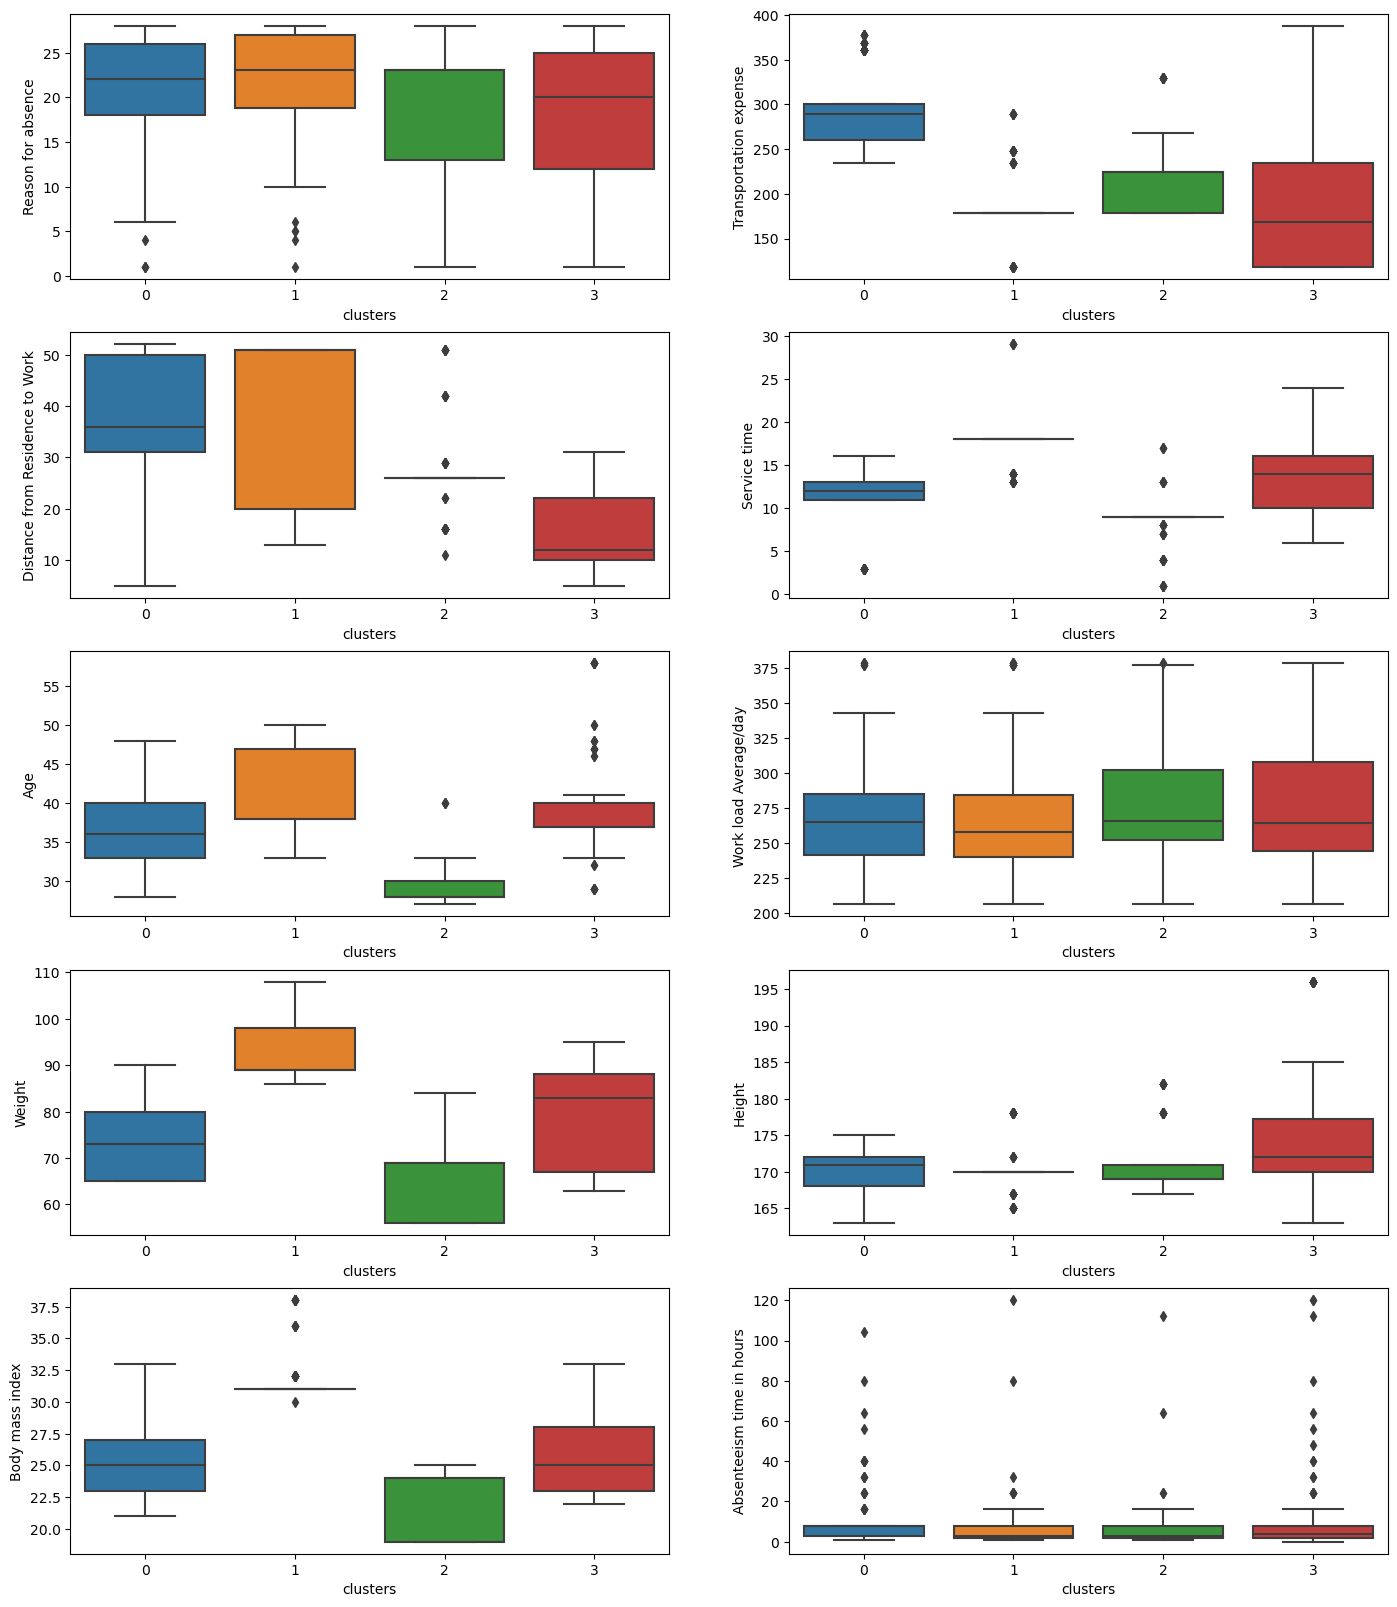

In [79]:
fig,ax=plt.subplots(5,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(num_var,range(len(num_var))):
    sns.boxplot(data=workdf,y=i,x='clusters',ax=ax[j])

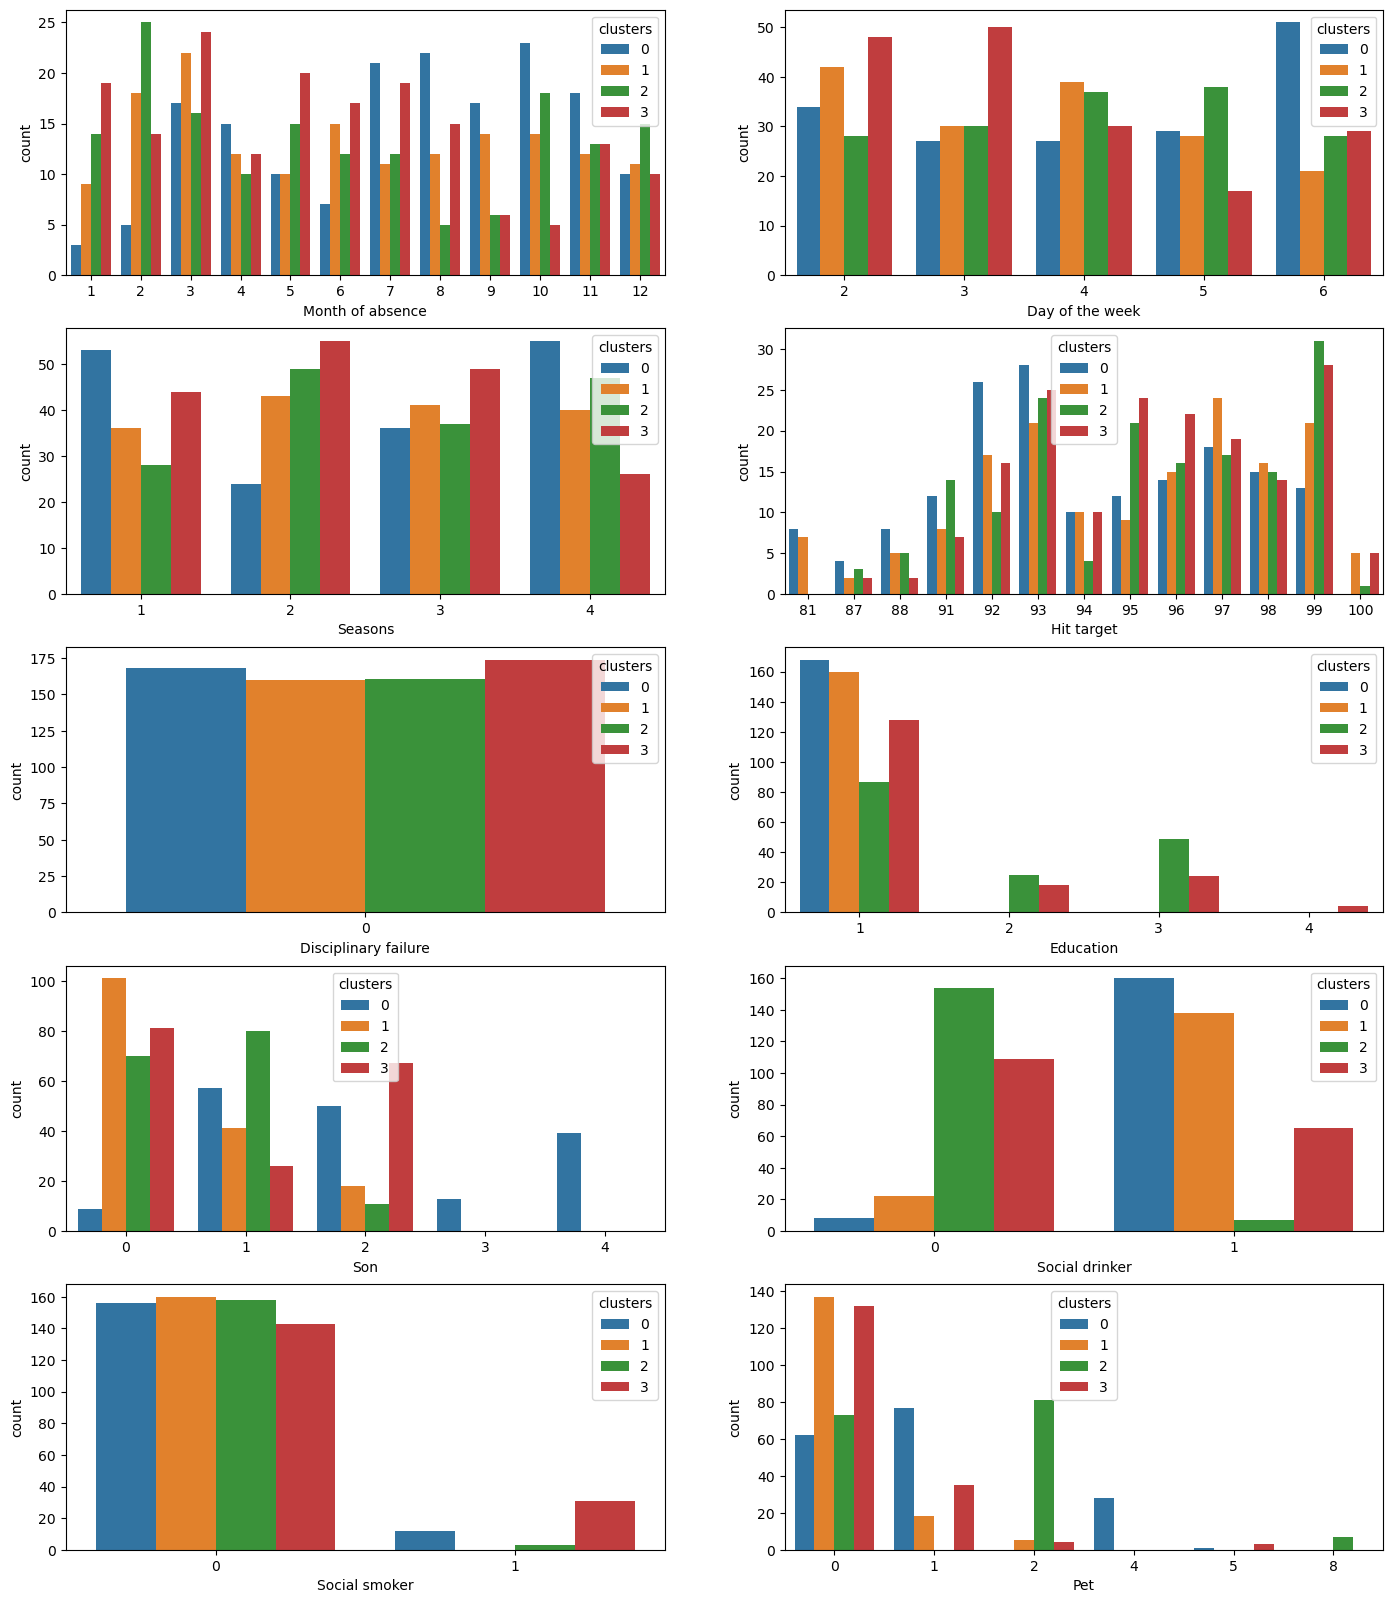

In [80]:
fig,ax=plt.subplots(5,2,figsize=(17,20))
ax=ax.ravel()
for i,j in zip(cat_var,range(len(cat_var))):
    sns.countplot(data=workdf,x=i,hue='clusters',ax=ax[j])

In [ ]:
# from the above chart 
# cluster 1 belong to the employees body mass index is higher , maximum weight , max age , max service .